In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [3]:
df=pd.read_csv(r'C:\Users\HP P DTS\Desktop\Python Classes\DataSet\weight-height.csv')

In [5]:
df.sample(5)

,Gender,Height,Weight
7091,Female,65.615612,123.498256
2520,Male,66.034956,160.193764
3003,Male,69.357976,200.941916
2762,Male,68.141642,170.799951
6570,Female,66.791009,142.775819


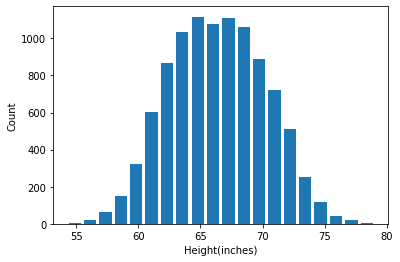

In [9]:
plt.hist(df['Height'],bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

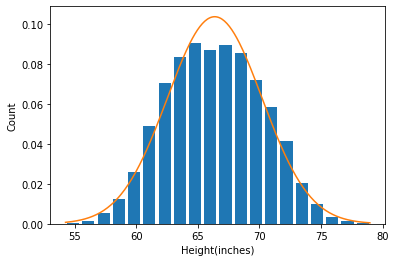

In [10]:
from scipy.stats import norm
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [11]:
df.Height.min()

54.2631333250971

In [12]:
df.Height.max()

78.99874234638959

In [16]:
rng=(np.arange(df.Height.min(),df.Height.max()),0.1)

In [17]:
rng

(array([54.26313333, 55.26313333, 56.26313333, 57.26313333, 58.26313333,
        59.26313333, 60.26313333, 61.26313333, 62.26313333, 63.26313333,
        64.26313333, 65.26313333, 66.26313333, 67.26313333, 68.26313333,
        69.26313333, 70.26313333, 71.26313333, 72.26313333, 73.26313333,
        74.26313333, 75.26313333, 76.26313333, 77.26313333, 78.26313333]), 0.1)

In [18]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [19]:
upper_limit=df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [20]:
lower_limit=df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250136

In [21]:
df[(df['Height']<lower_limit) | (df['Height']>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [22]:
df.shape

(10000, 3)

In [25]:
df_no_outlier_std_dev=df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.shape

(9993, 3)

In [27]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

In [28]:
df['Zscore']=(df.Height - df.Height.mean())/df.Height.std()

In [29]:
df['Zscore']

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
5       0.230136
6       0.628331
7       0.514865
8       0.169301
9      -0.756607
10      1.254786
11      1.370554
12     -0.416171
13      0.757762
14      0.747538
15      0.332177
16      1.572635
17     -0.622019
18      0.850546
19      0.407650
20      0.402204
21      0.798404
22     -0.056771
23      2.297167
24      0.396524
25      0.461718
26      0.707486
27      1.672056
28      0.273860
29      0.553305
          ...   
9970   -0.194624
9971   -0.448941
9972   -1.485064
9973   -1.463415
9974   -0.253049
9975   -0.030055
9976   -1.271376
9977   -0.486734
9978   -2.337033
9979   -1.120602
9980   -1.532230
9981   -1.539767
9982    0.909922
9983   -0.139527
9984   -1.902658
9985    0.434956
9986   -0.783584
9987   -0.196832
9988   -1.774862
9989   -1.406741
9990   -0.828600
9991   -0.969684
9992   -1.114931
9993   -1.647064
9994   -1.889345
9995   -0.050658
9996    0.181830
9997   -0.6496

In [30]:
df.head(5)

,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [31]:
(73.847017 -66.37)/3.84 

1.9471398437499974

In [32]:
df[df['Zscore']>3]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [33]:
df[df['Zscore']<-3]

,Gender,Height,Weight,Zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [34]:
df[(df['Zscore']<-3)|(df['Zscore']>3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [35]:
df_no_outlier=df[(df['Zscore']<-3)|(df['Zscore']>3)]

In [36]:
df_no_outlier.head()

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
